# main.ipynb


This file includes a series of attempts to construct an effective text classification model, accompanied by code and comments demonstrating our thought process as well as output of different variables to show how we attempted to verify things were working.

In [238]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV as LogReg
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix

<span style="color:red;font-size: larger">Part 1: Developing Our Multinomial Naive Bayes Model (Chapter Classification) </span>

In [239]:
# Load the data
labelled_data = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')
labelled_data.rename(columns={'Unnamed: 0': 'label'}, inplace=True)

#testing
labelled_data.head()

,label,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
labelled_data.head()

,label,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
unlabelled_data = pd.read_csv('AllBooks_baseline_DTM_Unlabelled_duplicate.csv')
labelled_data.rename(columns={'# foolishness': 'foolishness'}, inplace=True)

unlabelled_data.head()

,# foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
# The below is for using the already vectorized BoW (bag of words) data
# and doing a TF-IDF transform on it and then feeding it into the model

# Assuming 'labelled_data' is your original dataframe
# 'labels' column is the one with text labels like "Buddhism_Ch1"

# Step 1: Separate labels from features
labels = labelled_data['label'].values  # This creates a separate array of labels
labelled_data = labelled_data.drop('label', axis=1)  # This drops the label column from the dataframe

# Step 2: Encode labels if necessary
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # This encodes text labels to numbers

# Finally, view output
labelled_data

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
labelled_data.dtypes #testing

foolishness    int64
hath           int64
wholesome      int64
takest         int64
feelings       int64
               ...  
visual         int64
thoughts       int64
illumines      int64
attire         int64
explains       int64
Length: 8266, dtype: object

In [244]:
X_train = labelled_data
y_train = encoded_labels
y_train # testing

array([112, 123, 134, 145, 153, 154, 155, 156, 157, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       146, 147, 148, 149, 150, 151, 152, 158, 169, 180, 191, 202, 213,
       224, 235, 238, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 239, 313, 324,
       335, 346, 357, 368, 379, 390, 240, 251, 262, 273, 284, 295, 306,
       310, 311, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 35

In [245]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    labelled_data, encoded_labels, test_size=0.5)

In [246]:
# so that training set is based on entire 'labelled' dataset
X_train = labelled_data
y_train = encoded_labels

#testing
y_train

array([112, 123, 134, 145, 153, 154, 155, 156, 157, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       146, 147, 148, 149, 150, 151, 152, 158, 169, 180, 191, 202, 213,
       224, 235, 238, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 239, 313, 324,
       335, 346, 357, 368, 379, 390, 240, 251, 262, 273, 284, 295, 306,
       310, 311, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 35

In [247]:
# Checking output of train test split
X_train

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
X_test

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
y_train

array([112, 123, 134, 145, 153, 154, 155, 156, 157, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       146, 147, 148, 149, 150, 151, 152, 158, 169, 180, 191, 202, 213,
       224, 235, 238, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 239, 313, 324,
       335, 346, 357, 368, 379, 390, 240, 251, 262, 273, 284, 295, 306,
       310, 311, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 35

In [250]:
y_test

array([223, 334, 247, 448, 425, 144,  36, 455, 520, 160, 154, 475, 199,
       460, 270,  32, 307, 314, 483, 229, 134, 572, 181, 306, 255, 338,
       264, 251, 128, 367, 253, 454, 170, 496,  43, 538, 444, 125,  52,
       192,  85, 383, 442, 271, 540, 372, 214, 452, 546, 510, 560, 183,
        76,  94,   9, 101, 413, 293, 384, 436,  46, 275, 276,   2, 131,
       539, 518, 209, 310, 337, 172, 428,  58, 133, 374, 497, 179, 362,
       262, 389, 532, 521, 418, 205, 481, 466, 281, 437, 378,  99, 587,
       501, 534, 126, 409,  25, 248,  45, 158, 524, 252,  22, 369, 267,
       328, 114,  65, 523,  64, 487, 528, 385, 206, 216, 480, 220, 464,
       522, 359, 360, 301, 580, 120, 333, 330, 167, 336, 412, 327, 165,
        59, 402,  75, 298, 246, 256, 575, 357, 152, 272, 588, 453, 353,
       104, 106, 241, 321, 283, 111, 500, 479, 393, 371, 182, 488, 484,
       406,  20,  95, 266,   0, 558, 373, 124, 380,  83,  41, 477, 261,
       340,  44, 586, 316, 282, 395, 215, 456,  38, 403,  86,  8

In [251]:
# Trying to skip the CountVectorizer step and directly feed the data into the TfidfTransformer
# since the spreadsheet already has the word counts, so
# effectively the spreadsheet is already the output of the CountVectorizer

# Ensure the data is all numeric / float
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

#transform X_train into sparse matrix
X_train_sparse = csr_matrix(X_train.values)

#apply the tfidf_transformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)


In [252]:
X_train

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
# Assuming 'X' is your frequency matrix and 'y' is your target array
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
print("Model accuracy:", model.score(X_test_tfidf, y_test))  # Evaluating the model


Model accuracy: 0.9966101694915255


In [254]:
## PREDICTIONS ##

# Ensure unlabelled_data has correct data types (float) and correct any label issues.
unlabelled_data = unlabelled_data.astype(np.float64)

unlabelled_data_sparse = csr_matrix(unlabelled_data.values)

# Apply the same TF-IDF transformation on unlabelled data
transformer = TfidfTransformer(use_idf=False)
unlabelled_data_tfidf = transformer.transform(X=unlabelled_data_sparse)

# Predict using the trained model
unlabelled_predictions = model.predict(unlabelled_data_tfidf)

# transform the numerical predictions back to label names using the inverse transform of LabelEncoder
predicted_labels = label_encoder.inverse_transform(unlabelled_predictions)


In [255]:
predicted_labels # testing to view predicted labels (chapters)

array(['Buddhism_Ch1', 'Buddhism_Ch3', 'Buddhism_Ch4', 'Buddhism_Ch5',
       'Buddhism_Ch5', 'Buddhism_Ch6', 'Buddhism_Ch7', 'Buddhism_Ch8',
       'Buddhism_Ch9', 'Buddhism_Ch10', 'Buddhism_Ch11', 'Buddhism_Ch12',
       'Buddhism_Ch13', 'BookOfEccleasiasticus_Ch1', 'Buddhism_Ch15',
       'Buddhism_Ch16', 'Buddhism_Ch17', 'Buddhism_Ch18', 'Buddhism_Ch19',
       'Buddhism_Ch20', 'Buddhism_Ch21', 'Buddhism_Ch22', 'Buddhism_Ch23',
       'Buddhism_Ch24', 'Buddhism_Ch25', 'Buddhism_Ch26', 'Buddhism_Ch27',
       'Buddhism_Ch28', 'Buddhism_Ch29', 'Buddhism_Ch30', 'Buddhism_Ch31',
       'Buddhism_Ch32', 'Buddhism_Ch33', 'Buddhism_Ch34', 'Buddhism_Ch35',
       'Buddhism_Ch36', 'Buddhism_Ch37', 'Buddhism_Ch38', 'Buddhism_Ch39',
       'Buddhism_Ch40', 'Buddhism_Ch41', 'Buddhism_Ch42', 'Buddhism_Ch43',
       'Buddhism_Ch44', 'Buddhism_Ch45', 'Buddhism_Ch46',
       'TaoTeChing_Ch1', 'TaoTeChing_Ch2', 'TaoTeChing_Ch3',
       'TaoTeChing_Ch4', 'TaoTeChing_Ch5', 'TaoTeChing_Ch6',
       'T

Confusion matrix (subset):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 

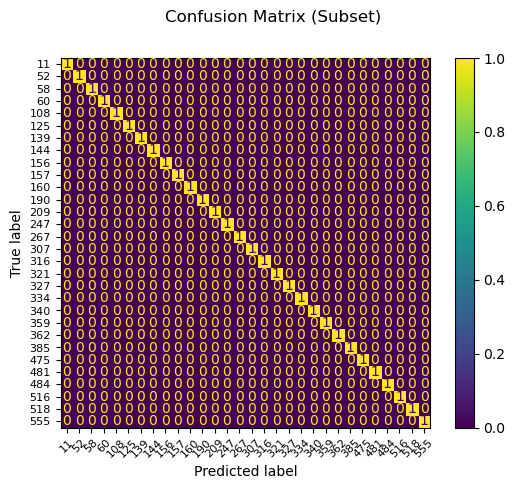

<Figure size 1000x2000 with 0 Axes>

In [256]:
# Visualize performance using confusion matrices to get summary of
#predictions made by our classifier model compared to the actual labels.

# confusion matrix based on smaller, random subset of labels (because we have 590 classes/chapters
# which is difficult to visualize)

predict_test = model.predict(X_test_tfidf) #get the model predictions based on the testing data

subset_size = 30

# Get a random subset of indices
subset_indices = np.random.choice(len(y_test), size=subset_size, replace=False)

# Get the subset of true labels and predicted labels
y_test_subset = y_test[subset_indices]
predict_test_subset = predict_test[subset_indices]

# Create confusion matrix based on the subset
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_subset, predict_test_subset)

# Visualize the confusion matrix
disp.figure_.suptitle("Confusion Matrix (Subset)")
print(f"Confusion matrix (subset):\n{disp.confusion_matrix}")
plt.xticks(rotation=45)
plt.xticks(fontsize=8)# make size smaller so they don't overlap
plt.yticks(fontsize=8)
plt.figure(figsize=(10, 20))# Adjust the size as needed
plt.show()

<span style="color:red;font-size: larger">PART 2: Updating the Multinomial Bayes Model (Book Classification) </span>

In [257]:
#load data

labelled_data = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')
labelled_data.rename(columns={'Unnamed: 0': 'label'}, inplace=True)

# Extract labels (book names) and features (bag of words)
labels = labelled_data['label'].str.split('_').str[0].values
label_encoder = LabelEncoder()

#instead of encoding with chapters, we now encode with book name
encoded_labels = label_encoder.fit_transform(labels) 
labelled_data = labelled_data.drop('label', axis=1)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    labelled_data, encoded_labels, test_size=0.5)
#train on whole dataset
X_train = labelled_data
y_train = encoded_labels

# Convert to sparse matrices and apply TF-IDF transformation
X_train_sparse = csr_matrix(X_train.values.astype(np.float64))
X_test_sparse = csr_matrix(X_test.values.astype(np.float64))

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_sparse)
X_test_tfidf = tfidf_transformer.transform(X_test_sparse)

# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

print("Model accuracy:", model.score(X_test_tfidf, y_test))


Model accuracy: 0.847457627118644


In [258]:
# Load unlabelled data
unlabelled_data = pd.read_csv('AllBooks_baseline_DTM_Unlabelled_duplicate.csv')
labelled_data.rename(columns={'# foolishness': 'foolishness'}, inplace=True)
unlabelled_data_sparse = csr_matrix(unlabelled_data.values.astype(np.float64))

# Apply TF-IDF transformation on unlabelled data
unlabelled_data_tfidf = tfidf_transformer.transform(unlabelled_data_sparse)

# Predict book names
unlabelled_predictions = model.predict(unlabelled_data_tfidf)
predicted_book_names = label_encoder.inverse_transform(unlabelled_predictions)

In [259]:
predicted_book_names

array(['YogaSutra', 'Buddhism', 'Buddhism', 'YogaSutra', 'YogaSutra',
       'Buddhism', 'YogaSutra', 'Buddhism', 'YogaSutra', 'YogaSutra',
       'YogaSutra', 'Buddhism', 'Buddhism', 'YogaSutra', 'YogaSutra',
       'YogaSutra', 'Buddhism', 'Buddhism', 'Upanishad', 'YogaSutra',
       'Buddhism', 'YogaSutra', 'YogaSutra', 'YogaSutra', 'YogaSutra',
       'YogaSutra', 'Upanishad', 'YogaSutra', 'Buddhism', 'Buddhism',
       'YogaSutra', 'YogaSutra', 'Buddhism', 'YogaSutra', 'YogaSutra',
       'Upanishad', 'Buddhism', 'Buddhism', 'Buddhism', 'Buddhism',
       'Buddhism', 'Buddhism', 'YogaSutra', 'Buddhism', 'Buddhism',
       'YogaSutra', 'TaoTeChing', 'YogaSutra', 'TaoTeChing', 'TaoTeChing',
       'TaoTeChing', 'YogaSutra', 'TaoTeChing', 'TaoTeChing',
       'TaoTeChing', 'TaoTeChing', 'TaoTeChing', 'YogaSutra',
       'TaoTeChing', 'TaoTeChing', 'TaoTeChing', 'TaoTeChing',
       'TaoTeChing', 'TaoTeChing', 'TaoTeChing', 'Upanishad', 'YogaSutra',
       'Upanishad', 'TaoTeChing', '

Confusion matrix:
[[30  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  1]
 [13  0  2  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  3 11]
 [ 0  0  0  0  0 28  2  4]
 [ 0  0  0  0  0  0 88  0]
 [ 0  0  0  0  0  0  0 92]]


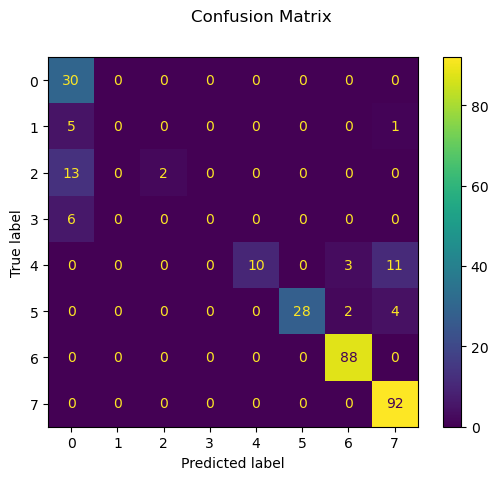

In [260]:
# confusion matrix with book as labels #

predict_test = model.predict(X_test_tfidf) #get the model predictions based on the testing data

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
